<a href="https://colab.research.google.com/github/kfahn22/Colab_notebooks/blob/main/brute_force_feature_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Connect Google Drive to Google Colab
#=====================================
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://www.educative.io/answers/feature-matching-opencv#

https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html

## Install dependencies

In [ ]:
!pip install opencv-python

## Features with Brute Force & SIFT

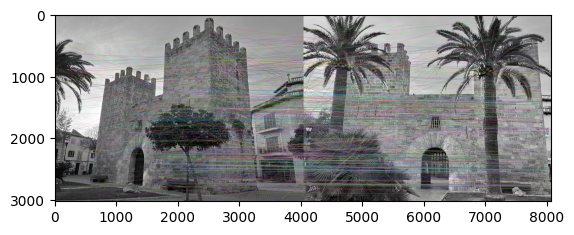

(<matplotlib.image.AxesImage at 0x7907a128ec50>, None)

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Load the images
img1 = cv.imread('/content/right.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('/content/center.jpg',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

## Feature Matching with FLANN

FLANN was proposed in [Fast Approximate Nearest Neighbors With Automatic Algorithm Configuration](https://www.cs.ubc.ca/research/flann/uploads/FLANN/flann_visapp09.pdf) by Muja and Lowe.

In [ ]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

In [ ]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 12,
                   key_size = 20,
                   multi_probe_level = 2)

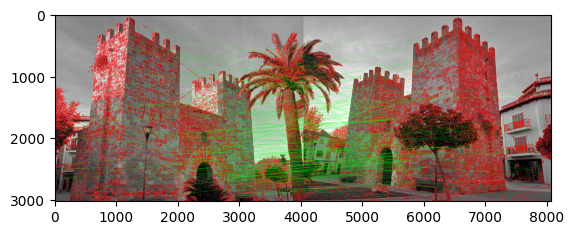

(<matplotlib.image.AxesImage at 0x790792f16fe0>, None)

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('/content/left.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('/content/right.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()